In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 734k/734k [00:01<00:00, 393kB/s]

Extracting files...
Path to dataset files: C:\Users\Ishwari kafle\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('../data/diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
gender_diabetes_counts = diabetes.groupby(['gender', 'diabetes']).size().reset_index(name='count')
print(gender_diabetes_counts)

   gender  diabetes  count
0  Female         0  54091
1  Female         1   4461
2    Male         0  37391
3    Male         1   4039
4   Other         0     18


 distribution of diabetic vs non-diabetic patients by proportion as a total

In [7]:
diabetes['diabetes'].value_counts(True)

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

Here, 91.5% are non diabetes patients and 8.5 % are diabetes patients.

In [8]:
# drop the rows having gender = other
diabetes = diabetes.drop(diabetes[diabetes['gender'] == 'Other'].index)

In [9]:
diabetes['diabetes'].value_counts(True)

diabetes
0    0.914985
1    0.085015
Name: proportion, dtype: float64

After dropping irrelevant columns from the dataset "diabetes_prediction_dataset.csv", preprocess the data by handling categorical features, scaling numerical features, splitting the data into training and testing sets, and addressing class imbalance. Then, choose and train a suitable machine learning model for binary classification, evaluate its performance, and summarize the findings.

## Handle categorical features

Convert categorical columns like 'gender' and 'smoking_history' into numerical representations using one-hot encoding or other appropriate techniques.


Identify and one-hot encode the categorical columns 'gender' and 'smoking_history' in the `diabetes` DataFrame.


In [10]:
categorical_cols = ['gender', 'smoking_history']
diabetes_encoded = pd.get_dummies(diabetes, columns=categorical_cols, drop_first=True)
display(diabetes_encoded.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,True,False,False,False,False


## Scale numerical features

Scale numerical features like 'age', 'bmi', 'HbA1c_level', and 'blood_glucose_level' to ensure that they have similar ranges, which can improve the performance of some machine learning models.


Identify and scale the numerical features using StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
diabetes_encoded[numerical_cols] = scaler.fit_transform(diabetes_encoded[numerical_cols])
display(diabetes_encoded.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692577,0,1,-0.321051,1.001692,0.047709,0,False,False,False,False,True,False
1,0.537899,0,0,-0.000114,1.001692,-1.426157,0,False,False,False,False,False,False
2,-0.616779,0,0,-0.000114,0.161089,0.489869,0,True,False,False,False,True,False
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,0,False,True,False,False,False,False
4,1.514935,1,1,-1.081957,-0.679515,0.416175,0,True,True,False,False,False,False


## Split the data

Split the dataset into training and testing sets to evaluate the performance of your model.


Split the data into features (X) and target variable (y), then split these into training and testing sets.



In [12]:
from sklearn.model_selection import train_test_split

X = diabetes_encoded.drop('diabetes', axis=1)
y = diabetes_encoded['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (79985, 12)
Shape of X_test: (19997, 12)
Shape of y_train: (79985,)
Shape of y_test: (19997,)


## Address class imbalance

Since the 'diabetes' column is imbalanced, consider techniques like oversampling or undersampling to balance the classes in the training set.


Check the distribution of the target variable in the training set to understand the class imbalance.



In [13]:
print("Class distribution in y_train:")
print(y_train.value_counts())
print("\nClass distribution in y_train (proportion):")
print(y_train.value_counts(normalize=True))

Class distribution in y_train:
diabetes
0    73260
1     6725
Name: count, dtype: int64

Class distribution in y_train (proportion):
diabetes
0    0.915922
1    0.084078
Name: proportion, dtype: float64


Import and apply RandomOverSampler to balance the training data and then verify the class distribution of the resampled target variable.



In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution in y_train_resampled:")
print(y_train_resampled.value_counts())
print("\nClass distribution in y_train_resampled (proportion):")
print(y_train_resampled.value_counts(normalize=True))

Class distribution in y_train_resampled:
diabetes
0    73260
1    73260
Name: count, dtype: int64

Class distribution in y_train_resampled (proportion):
diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64


## Choose and train a model

Select a suitable machine learning model for binary classification (e.g., Logistic Regression, RandomForest, SVM) and train it on the preprocessed training data.


Import and train a Logistic Regression model on the resampled training data.



In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

## Evaluate the model

Evaluate the trained model on the testing set using appropriate metrics like accuracy, precision, recall, and F1-score.


Evaluate the trained Logistic Regression model on the test set using accuracy, precision, recall, and F1-score.



In [16]:


from sklearn.metrics import accuracy_score, precision_recall_fscore_support

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

Accuracy: 0.8892
Precision: 0.4386
Recall: 0.8879
F1-score: 0.5872


### Key Findings

*   Categorical features ('gender', 'smoking\_history') were successfully converted into numerical representations using one-hot encoding.
*   Numerical features ('age', 'bmi', 'HbA1c\_level', 'blood\_glucose\_level') were scaled using StandardScaler.
*   The dataset was split into training (80%) and testing (20%) sets.
*   The training set showed a significant class imbalance, with approximately 91.6% non-diabetic and 8.4% diabetic cases.
*   Random Over-Sampling was applied to the training data, resulting in a balanced class distribution with approximately 50% for each class.
*   A Logistic Regression model was trained on the resampled training data.
*   The trained model achieved an accuracy of 0.8893, a precision of 0.4390, a recall of 0.8885, and an F1-score of 0.5877 on the test set.

### Insights or Next Steps

*   The high recall score indicates the model is effective at identifying diabetic cases, which is crucial in medical diagnosis, but the low precision suggests a significant number of false positives.
*   Further model tuning or exploring other classification algorithms (e.g., RandomForest, Gradient Boosting) could potentially improve precision while maintaining a high recall.


## Choose and train a RandomForest model

Train a RandomForest Classifier on the preprocessed and resampled training data.

Import and train a RandomForest Classifier model on the resampled training data.

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

## Evaluate the RandomForest model

Evaluate the trained RandomForest Classifier on the testing set using appropriate metrics.

Evaluate the trained RandomForest Classifier model on the test set using accuracy, precision, recall, and F1-score.

In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

print(f"RandomForest Accuracy: {accuracy_rf:.4f}")
print(f"RandomForest Precision: {precision_rf:.4f}")
print(f"RandomForest Recall: {recall_rf:.4f}")
print(f"RandomForest F1-score: {f1_score_rf:.4f}")

RandomForest Accuracy: 0.9643
RandomForest Precision: 0.8598
RandomForest Recall: 0.7149
RandomForest F1-score: 0.7807


### Key Findings

* Categorical features ('gender', 'smoking\_history') were successfully converted into numerical representations using one-hot encoding.
* Numerical features ('age', 'bmi', 'HbA1c\_level', 'blood\_glucose\_level') were scaled using StandardScaler.
* The dataset was split into training (80%) and testing (20%) sets.
* The training set showed a significant class imbalance, with approximately 91.6% non-diabetic and 8.4% diabetic cases.
* Random Over-Sampling was applied to the training data, resulting in a balanced class distribution with approximately 50% for each class.
* A Logistic Regression model was trained on the resampled training data, achieving an accuracy of 0.8893, precision of 0.4390, recall of 0.8885, and F1-score of 0.5877 on the test set.
* A RandomForest Classifier model was trained on the resampled training data, achieving an accuracy of 0.9643, precision of 0.8598, recall of 0.7149, and F1-score of 0.7807 on the test set.

### Insights

* The RandomForest Classifier showed significant improvements in precision and F1-score compared to the Logistic Regression model, while maintaining a good accuracy.
* The higher precision of the RandomForest model means fewer non-diabetic cases are incorrectly classified as diabetic, which is important in a medical context.
* Further steps could include hyperparameter tuning for the RandomForest model, exploring other advanced models like Gradient Boosting, or analyzing feature importance to understand which features contribute most to the predictions.

In [19]:
# Example of new data (replace with your actual new data)
new_data = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'age': [30.0, 55.0],
    'hypertension': [0, 1],
    'heart_disease': [0, 0],
    'smoking_history': ['never', 'former'],
    'bmi': [22.0, 30.0],
    'HbA1c_level': [5.5, 7.0],
    'blood_glucose_level': [100, 180]
})

# Apply the same preprocessing steps as the training data

# 1. Handle Categorical Features
new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)

# Ensure new data has the same columns as the training data after one-hot encoding
# Add missing columns with default value 0
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
# Ensure the order of columns is the same
new_data_encoded = new_data_encoded[X_train.columns]


# 2. Scale Numerical Features using the *same* fitted scaler
new_data_encoded[numerical_cols] = scaler.transform(new_data_encoded[numerical_cols])

# 3. Predict using the trained RandomForest model
predictions = rf_model.predict(new_data_encoded)

print("Predictions for new data:", predictions)

Predictions for new data: [0 1]


## Analyze Feature Importance

Determine the importance of each feature in the RandomForest model's predictions to understand which factors are most influential in predicting diabetes.

Get the feature importances from the trained RandomForest model and display them.

Feature Importances (RandomForest Model):
HbA1c_level                    0.352054
blood_glucose_level            0.273396
age                            0.182684
bmi                            0.121197
hypertension                   0.028267
heart_disease                  0.013596
gender_Male                    0.007019
smoking_history_former         0.006559
smoking_history_never          0.005431
smoking_history_current        0.003694
smoking_history_not current    0.003333
smoking_history_ever           0.002768
dtype: float64


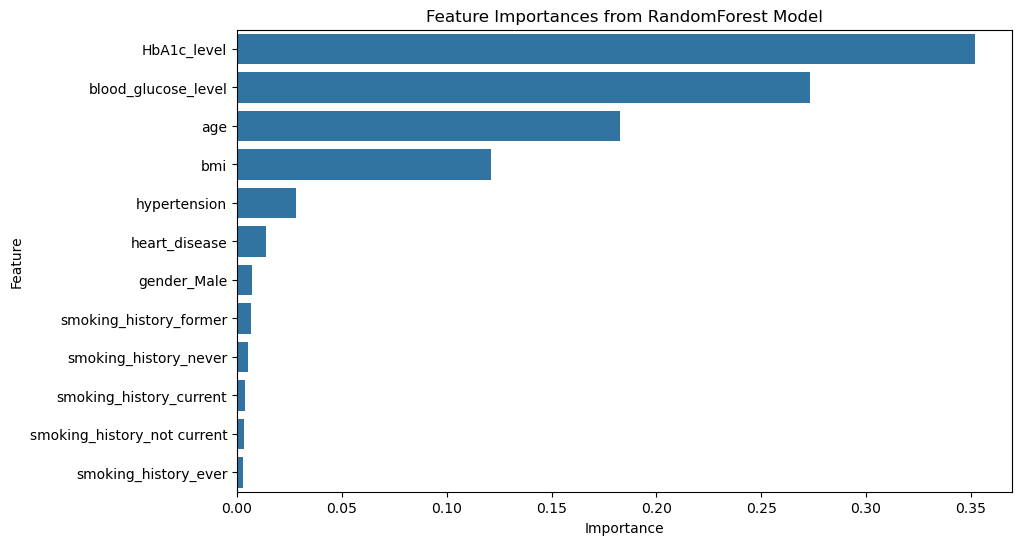

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the RandomForest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (RandomForest Model):")
print(sorted_feature_importances)

# Optional: Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)
plt.title('Feature Importances from RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Creating and saving the model.

In [21]:
import joblib
import os

# Define the filename for your model
model_filename = 'random_forest_diabetes_model.joblib'

# Save the trained model to the file
joblib.dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_diabetes_model.joblib


## Create a Gradio Interface

Build a web application using Gradio to allow users to input their information and get a diabetes prediction from the trained RandomForest model.

Import Gradio and define a prediction function that takes the same inputs as the model, preprocesses them, and returns the prediction. Then, create a Gradio interface using this function.

In [22]:
pip install gradio -q

Note: you may need to restart the kernel to use updated packages.


In [23]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model and scaler
# For this example, let's recreate a scaler based on the original data structure
# In a real deployment,load the saved scaler
dummy_data = pd.DataFrame({
    'age': [40.0],
    'bmi': [25.0],
    'HbA1c_level': [5.0],
    'blood_glucose_level': [100]
})
# Use the original numerical column names
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
# Fit on a dummy dataset with the correct structure
scaler.fit(diabetes[numerical_cols])


model = joblib.load('random_forest_diabetes_model.joblib')


def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c_level, blood_glucose_level):
    # Create a DataFrame from the inputs
    new_data = pd.DataFrame({
        'gender': [gender],
        'age': [float(age)],
        'hypertension': [int(hypertension)],
        'heart_disease': [int(heart_disease)],
        'smoking_history': [smoking_history],
        'bmi': [float(bmi)],
        'HbA1c_level': [float(hba1c_level)],
        'blood_glucose_level': [int(blood_glucose_level)]
    })

    # Apply the same preprocessing steps as the training data

    # 1. Handle Categorical Features (using the same columns as trained data)
    categorical_cols = ['gender', 'smoking_history']
    new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)

    # Ensure new data has the same columns as the training data after one-hot encoding
    # Add missing columns with default value 0
    # Use the columns from the training data (X_train) to ensure consistency
    missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
    for c in missing_cols:
        new_data_encoded[c] = 0
    # Ensure the order of columns is the same
    new_data_encoded = new_data_encoded[X_train.columns]


    # 2. Scale Numerical Features using the *same* fitted scaler
    new_data_encoded[numerical_cols] = scaler.transform(new_data_encoded[numerical_cols])

    # 3. Predict using the trained RandomForest model
    prediction = model.predict(new_data_encoded)

    # Return the prediction result
    if prediction[0] == 1:
        return "Prediction: Diabetes"
    else:
        return "Prediction: No Diabetes"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Radio(['Female', 'Male', 'Other'], label="Gender"),
        gr.Slider(minimum=0.08, maximum=80.0, label="Age"),
        gr.Radio([0, 1], label="Hypertension"),
        gr.Radio([0, 1], label="Heart Disease"),
        gr.Dropdown(['never', 'No Info', 'current', 'former', 'ever', 'not current'], label="Smoking History"),
        gr.Slider(minimum=10.01, maximum=95.69, label="BMI"),
        gr.Slider(minimum=3.5, maximum=9.0, label="HbA1c Level"),
        gr.Slider(minimum=80, maximum=300, label="Blood Glucose Level")
    ],
    outputs="text",
    title="Diabetes Prediction Model"
)

# Launch the interface
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://c79b69856f3bb542f3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
